In [ ]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
from sklearn.tree import DecisionTreeClassifier


###  ----------------------------------  Module 1-------------------------------------------

## Data collection 
#### - The dataset is from Kaggle 
#### - It consists of around 5000 legitimate websites and 5000 phishing websites which are merged together 

In [ ]:
# Reading the dataset
Data = pd.read_csv("Phishing_Legitimate_full.csv")
Data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0


## Data cleaning 
#### -  To remove any unnecessary values which may effect the Prediction 
#### - To find basic information of the dataset used  


In [ ]:
Data = Data.drop(['ExtMetaScriptLinkRT','AbnormalExtFormActionR','PctExtResourceUrlsRT','UrlLengthRT','SubdomainLevelRT','ImagesOnlyInForm','MissingTitle','IframeOrFrame','SubmitInfoToEmail','PopUpWindow','RightClickDisabled','FakeLinkInStatusBar','FrequentDomainNameMismatch','PctNullSelfRedirectHyperlinks','AbnormalFormAction','ExtFormAction','RelativeFormAction','PctExtResourceUrls','PctExtHyperlinks','QueryLength','PathLength','HostnameLength','NumNumericChars','PctExtNullSelfRedirectHyperlinksRT'], axis = 1)


In [ ]:
# First 5 elements of the dataset
Data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,1,0,0,0,0,0,0,1,0,0,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Last 5 elements of the dataset
Data.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,1,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
#Dimentions 
Data.size

260000

In [ ]:
Data.shape

(10000, 26)

In [ ]:
#information about the dataframe 
Data.info

<bound method DataFrame.info of          id  NumDots  SubdomainLevel  ...  ExtFavicon  InsecureForms  CLASS_LABEL
0         1        3               1  ...           1              1            1
1         2        3               1  ...           0              1            1
2         3        3               1  ...           1              1            1
3         4        3               1  ...           1              1            1
4         5        3               0  ...           0              0            1
...     ...      ...             ...  ...         ...            ...          ...
9995   9996        3               1  ...           1              1            0
9996   9997        2               1  ...           0              1            0
9997   9998        2               1  ...           0              1            0
9998   9999        3               1  ...           0              1            0
9999  10000        3               1  ...           0             

In [ ]:
# This methos is used give the statistical information about the dataset 
Data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,0.000900,0.109300,0.057100,0.167200,0.844000,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,0.029988,0.368737,0.232045,0.373173,0.362873,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,23.000000,22.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking for null values 
Data.isnull().sum()

id                    0
NumDots               0
SubdomainLevel        0
PathLevel             0
UrlLength             0
NumDash               0
NumDashInHostname     0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumQueryComponents    0
NumAmpersand          0
NumHash               0
NoHttps               0
RandomString          0
IpAddress             0
DomainInSubdomains    0
DomainInPaths         0
HttpsInHostname       0
DoubleSlashInPath     0
NumSensitiveWords     0
EmbeddedBrandName     0
ExtFavicon            0
InsecureForms         0
CLASS_LABEL           0
dtype: int64

###  ----------------------------------  Module  2 -------------------------------------------

### Exploratory Data Analysis 

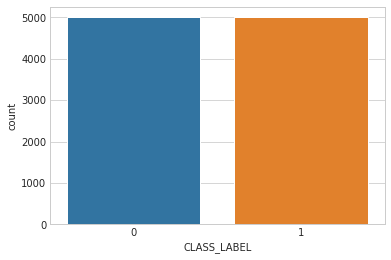

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='CLASS_LABEL',data=Data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


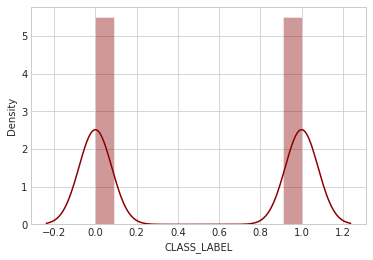

In [ ]:
sns.distplot(Data['CLASS_LABEL'], color='darkred')


In [ ]:
# Shuffling the datasets as the first 5000 rows consists of legitimate urls and the next 5000 rows consists of phishing urls
# Inorder to make sure the proper splitting of testing and training dataset
Data = Data.sample(frac=1).reset_index(drop=True)

In [ ]:
Data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
0,9208,2,1,0,29,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,3553,2,1,6,87,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1
2,5717,2,0,2,90,0,0,0,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,7875,2,1,5,73,2,0,0,0,2,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0
4,4617,2,0,5,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8780,4,1,4,57,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
9996,9066,2,0,1,54,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9997,3155,6,4,4,62,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,2,0,0,1,1
9998,9334,2,1,1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### - Line plot , scatter plot , Histogram and Heatmap will be Visualized 
#### - These plots are required to identify 


Text(0.5, 1.0, 'ID vs CLASS_LABEL')

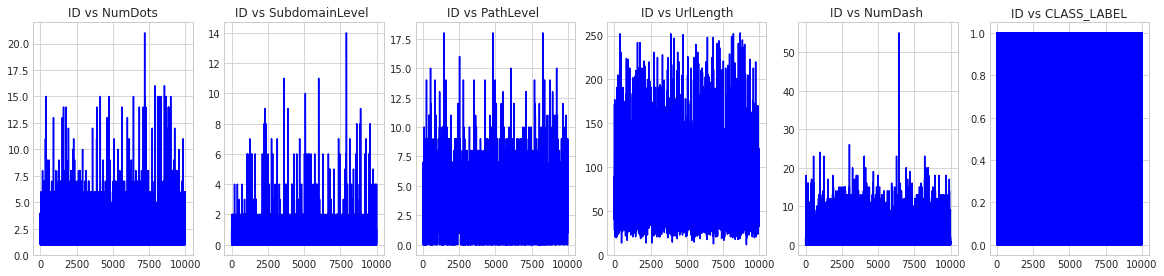

In [ ]:
# Line plot  - univariate 
x1 = Data['NumDots'] 
x2 = Data['SubdomainLevel']
x3 = Data['PathLevel']
x4 = Data['UrlLength']
x5 = Data['NumDash']
x6 = Data['CLASS_LABEL']
x7 = Data['NumDashInHostname']
x8 = Data['TildeSymbol']

plt.figure(figsize=(20,30))

plt.subplot(6,6,1)
plt.plot(x1, c='blue')
plt.title("ID vs NumDots")

plt.subplot(6,6,2)
plt.plot(x2, c='blue')
plt.title("ID vs SubdomainLevel ")

plt.subplot(6,6,3)
plt.plot(x3, c='blue')
plt.title("ID vs PathLevel ")

plt.subplot(6,6,4)
plt.plot(x4, c='blue')
plt.title("ID vs UrlLength")

plt.subplot(6,6,5)
plt.plot(x5, c='blue')
plt.title("ID vs NumDash ")

plt.subplot(6,6,6)
plt.plot(x6, c='blue')
plt.title("ID vs CLASS_LABEL")


Text(0.5, 1.0, ' NumDashInHostname vs CLASS_LABEL ')

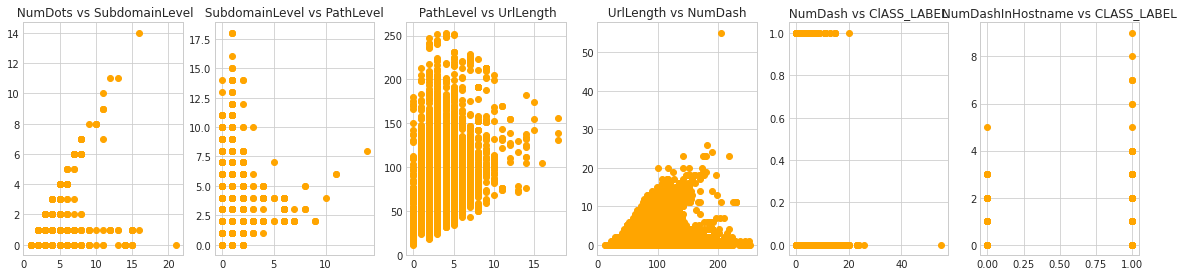

In [ ]:
# scatter plot  - bivariate 
plt.figure(figsize=(20,30))

plt.subplot(6,6,1)
plt.scatter(x1,x2, c='orange')
plt.title(" NumDots vs SubdomainLevel")

plt.subplot(6,6,2)
plt.scatter(x2,x3, c='orange')
plt.title(" SubdomainLevel vs PathLevel ")

plt.subplot(6,6,3)
plt.scatter(x3,x4, c='orange')
plt.title(" PathLevel vs UrlLength")

plt.subplot(6,6,4)
plt.scatter(x4,x5, c='orange')
plt.title(" UrlLength vs NumDash ")

plt.subplot(6,6,5)
plt.scatter(x5,x6, c='orange')
plt.title(" NumDash vs ClASS_LABEL ")

plt.subplot(6,6,6)
plt.scatter(x6,x7, c='orange')
plt.title(" NumDashInHostname vs CLASS_LABEL ")


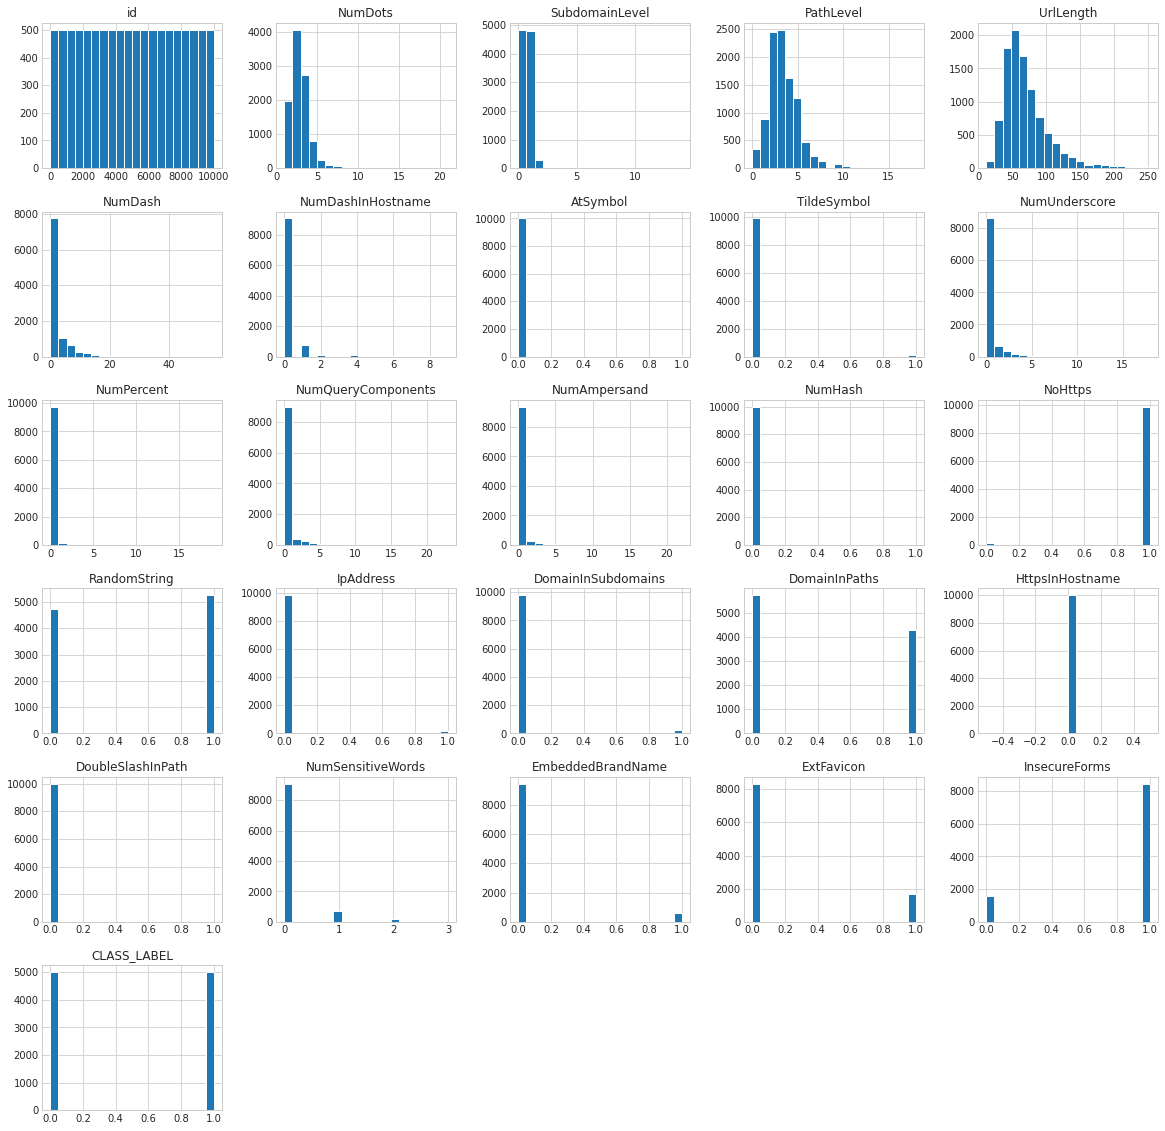

In [ ]:
# Histogram 
Data.hist(bins = 20,figsize = (20,20))
plt.show() 

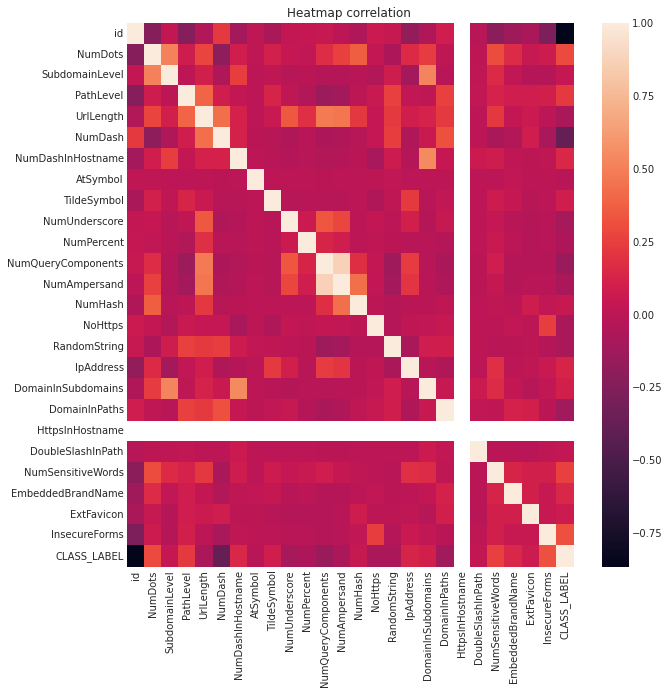

In [ ]:
# Heatmap correlation 
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr())
plt.title("Heatmap correlation ")
plt.show()

###  ----------------------------------  Module 3 -------------------------------------------

## Data Preprocessing 
####  - The variables which are required for detecting  phising websites will be idetified
####  - After identifying the reqired variables the data will be split into training and testing datasets 

In [ ]:
# Denoting target column "CLASS_LABEL" which is used to determing phising is given to the parameters X and Y
# splitting the data into data with "CLASS_LABEL" and data without "CLASS_LABEL"
X = Data.drop('CLASS_LABEL',axis=1)
Y = Data['CLASS_LABEL']

In [ ]:
# size and shape of X and Y 
print("The size of X parameter is " , X.size)
print("The size of Y parameter is " , Y.size)
print("The size of X parameter is " , X.shape)
print("The size of Y parameter is " , Y.shape)

The size of X parameter is  250000
The size of Y parameter is  10000
The size of X parameter is  (10000, 25)
The size of Y parameter is  (10000,)


In [ ]:
# Data without class  labels - X : Input
X

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms
0,9208,2,1,0,29,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,3553,2,1,6,87,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
2,5717,2,0,2,90,0,0,0,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,7875,2,1,5,73,2,0,0,0,2,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
4,4617,2,0,5,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8780,4,1,4,57,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
9996,9066,2,0,1,54,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0
9997,3155,6,4,4,62,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,2,0,0,1
9998,9334,2,1,1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Data with class labels - Y : Output 
Y

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [ ]:
# Splitting the Dataset into training and testing 
# ratio of testing and training datset is 70:30 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size=0.30, random_state=110)

In [ ]:
X_train

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms
8156,7310,2,0,5,68,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3993,6627,3,1,2,65,0,0,0,0,0,0,3,2,0,1,0,0,0,0,0,0,0,0,0,1
6764,3503,2,1,4,63,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4875,5901,1,0,2,139,4,0,0,0,2,0,10,9,0,1,0,0,0,0,0,0,0,0,0,1
9629,3027,5,4,4,103,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,5328,2,1,6,85,5,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
9487,8826,1,0,2,28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2109,2878,4,0,4,97,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
9955,6950,4,1,3,68,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms
9585,1979,2,0,2,47,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
5057,2834,5,1,10,205,1,0,0,0,3,0,5,5,1,1,1,0,0,1,0,0,0,0,0,1
8432,701,1,0,3,39,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6353,1776,2,1,3,39,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8535,6025,1,0,6,78,3,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,3184,2,1,4,64,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
6214,1663,3,1,4,51,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
188,5712,1,0,3,101,1,0,0,0,10,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
3165,9336,4,1,2,55,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
Y_train

8156    0
3993    0
6764    1
4875    0
9629    1
       ..
6525    0
9487    0
2109    1
9955    0
2176    0
Name: CLASS_LABEL, Length: 7000, dtype: int64

In [ ]:
Y_test

9585    1
5057    1
8432    1
6353    1
8535    0
       ..
5837    1
6214    1
188     0
3165    0
6270    1
Name: CLASS_LABEL, Length: 3000, dtype: int64

###  ----------------------------------  Module 4-------------------------------------------

## Model Training 
####  - Diffrent classification models will be applied for training and testing data 
#### - After applying the diffrent models accuracy of each model will be caluculated

## Multi layer Perceptron classifier 

In [ ]:
# classification mlp model for the  dataset
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
n_class = len(unique(Y))
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))


In [ ]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=2)
# evaluate on test set
yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(Y_test, yhat)
print('Accuracy of the model : %.3f' % acc)

Epoch 1/10
219/219 - 1s - loss: 4.2564 - 895ms/epoch - 4ms/step
Epoch 2/10
219/219 - 0s - loss: 0.3609 - 278ms/epoch - 1ms/step
Epoch 3/10
219/219 - 0s - loss: 0.5077 - 303ms/epoch - 1ms/step
Epoch 4/10
219/219 - 0s - loss: 0.2628 - 281ms/epoch - 1ms/step
Epoch 5/10
219/219 - 0s - loss: 0.1841 - 260ms/epoch - 1ms/step
Epoch 6/10
219/219 - 0s - loss: 0.2594 - 270ms/epoch - 1ms/step
Epoch 7/10
219/219 - 0s - loss: 0.2657 - 290ms/epoch - 1ms/step
Epoch 8/10
219/219 - 0s - loss: 0.2535 - 262ms/epoch - 1ms/step
Epoch 9/10
219/219 - 0s - loss: 0.1784 - 293ms/epoch - 1ms/step
Epoch 10/10
219/219 - 0s - loss: 0.3636 - 262ms/epoch - 1ms/step
Accuracy of the model : 0.932


## Stochastic Gradient Descent



In [ ]:
from sklearn.svm import SVC


In [ ]:
svc=SVC()
model_5=svc.fit(X_train , Y_train)

In [ ]:
svm_predict=model_5.predict(X_test)


In [ ]:
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,Y_test))


The accuracy of SVM Classifier is:  99.93333333333332


In [ ]:
print(classification_report(svm_predict,Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### XGboost

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb=XGBClassifier()
model_7=xgb.fit(X_train,Y_train)

In [ ]:
xgb_predict=model_7.predict(X_test)


In [ ]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,Y_test))


The accuracy of XGBoost Classifier is:  99.96666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


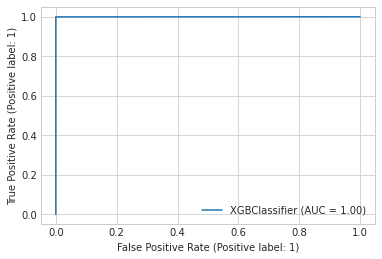

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_7,X_test, Y_test)


###Adaboost

In [ ]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier()

# evaluate the model for training and testing dataset 
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=2)
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores1 =cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')

# Accuracy of the training and testing dataset 
print('Accuracy of the training dataset: %.3f(%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy of the testing dataset: %.3f(%.3f)' % (mean(n_scores1), std(n_scores1)))

Accuracy of the training dataset: 1.000(0.000)
Accuracy of the testing dataset: 1.000(0.002)


### Ensemble Tree depth effect

In [ ]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
  X = Data.drop('CLASS_LABEL',axis=1)
  Y = Data['CLASS_LABEL']

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models


In [ ]:
print("The performance evaluation of training dataset ")
# evaluate a given model using cross-validation
def evaluate_model(model, X_train, Y_train):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
  
 # get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, Y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

The performance evaluation of training dataset 
>1 1.000 (0.000)
>2 1.000 (0.000)
>3 1.000 (0.000)
>4 1.000 (0.000)
>5 1.000 (0.000)
>6 1.000 (0.000)
>7 1.000 (0.000)
>8 1.000 (0.000)
>9 1.000 (0.000)
>10 1.000 (0.000)


The performatce box plot of training dataset 


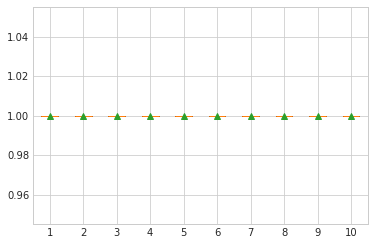

In [ ]:
#plot model performance for comparison
print("The performatce box plot of training dataset ")
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###  ----------------------------------  Module 5-------------------------------------------

### Perfomance and Accuracy Prediction 

Comparision graph

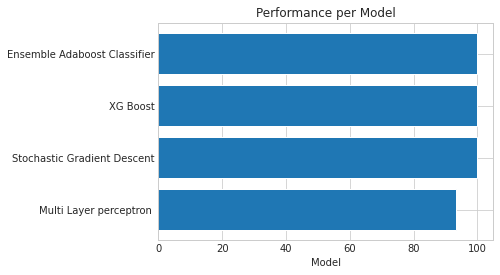

<Figure size 432x288 with 0 Axes>

In [ ]:

objects = ('Multi Layer perceptron ','Stochastic Gradient Descent','XG Boost','Ensemble Adaboost Classifier')
y_pos = np.arange(len(objects))
performance = [93.25,99.93,99.966,99.99]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Performance per Model')

plt.show()
plt.savefig('accuracy_per_model.png')